In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
df = pd.read_csv('suicide_rates.csv')

# The project uses a data set of suicides number and many other factors to explore what factors has the most significant impact on the suicides rate.

In [41]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_rate', 'country-year', 'HDI',
       'gdp_for_year', 'gdp_per_capita', 'generation']

In [42]:
# the data in year 2016 is not complete, so it should be dropped
df = df.loc[df['year']!=2016,:]
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(int)
df_year = df.groupby('year')['suicides_no'].sum()

In [43]:
df

,country,year,sex,age,suicides_no,population,suicides_rate,country-year,HDI,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


Text(0.5, 1.0, 'Number of suicides from 1985 to 2015')

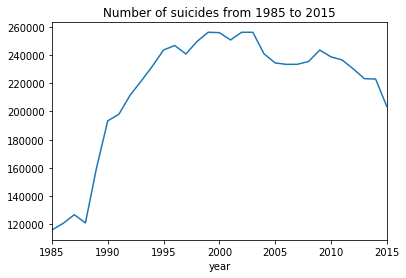

In [44]:
# show the change in suicides number per year
fig, ax = plt.subplots()
df_year.plot(x='year', y='suicides_no', ax = ax)
ax.set_title('Number of suicides from 1985 to 2015')

In [45]:
df_country_year = df.groupby('country-year')['suicides_no'].sum()
df_population = df.groupby('country-year')['population'].sum()
df_country_pgdp = df.groupby('country-year')['gdp_per_capita'].sum()
df_country_gdp = df.groupby('country-year')['gdp_for_year'].sum()

In [46]:
# explore the relationship between gdp per capita and suicides rate
suicide_pgdp = pd.DataFrame()

In [47]:
suicide_pgdp['gdp_percapita'] = df_country_pgdp
suicide_pgdp['suicides_rate'] = df_country_year / df_population

Text(0.5, 1.0, 'Relationship between gdp per capita and suicides rate')

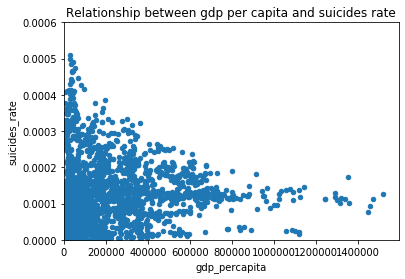

In [48]:
fig, ax = plt.subplots()
suicide_pgdp.plot.scatter(x='gdp_percapita', y='suicides_rate', ax=ax)
ax.set_ybound(lower=0, upper=0.0006)
ax.set_xbound(lower=0)
ax.set_title('Relationship between gdp per capita and suicides rate')

In [49]:
reg = smf.ols('suicides_rate ~ gdp_percapita', data=suicide_pgdp).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides_rate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.542
Date:                Thu, 19 Dec 2019   Prob (F-statistic):            0.00351
Time:                        10:21:21   Log-Likelihood:                 18226.
No. Observations:                2305   AIC:                        -3.645e+04
Df Residuals:                    2303   BIC:                        -3.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0001   2.49e-06     45.227

<b>The t-value and p-value told us that there is a relationship between suicides rate and gdp_percapita, but we can find that the R_squared is very lower, so we may conclude that the gdp_percapita does not influence the suicides rate a lot. </b>

In [50]:
# explore the relationship between gdp and suicides rate
suicide_gdp = pd.DataFrame()
suicide_gdp['gdp'] = df_country_gdp
suicide_gdp['suicides_rate'] = df_country_year / df_population
suicide_gdp

,gdp,suicides_rate
country-year,,
Albania1987,25879498800,0.000027
Albania1988,25512000000,0.000023
Albania1989,28021499856,0.000024
Albania1992,8513431008,0.000017
Albania1993,14736852456,0.000026
Albania1994,23828085576,0.000018
Albania1995,29093988108,0.000030
Albania1996,39778779504,0.000030
Albania1997,28318837296,0.000057


Text(0.5, 1.0, 'Relationship between gdp and suicides rate')

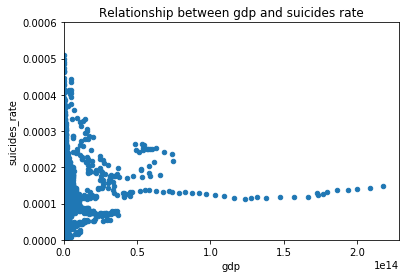

In [51]:
fig, ax = plt.subplots()
suicide_gdp.plot.scatter(x='gdp', y='suicides_rate', ax=ax)
ax.set_ybound(lower=0, upper=0.0006)
ax.set_xbound(lower=0)
ax.set_title('Relationship between gdp and suicides rate')

In [52]:
reg = smf.ols('suicides_rate ~ gdp', data=suicide_gdp).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides_rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.08
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           0.000519
Time:                        10:21:24   Log-Likelihood:                 18228.
No. Observations:                2305   AIC:                        -3.645e+04
Df Residuals:                    2303   BIC:                        -3.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.94e-06     59.445      0.0

<b>The t-value and p-value told us that there is a relationship between suicides rate and gdp, but we can find that the R_squared is very lower, so we may conclude that the gdp does not influence the suicides rate a lot. </b>

In [54]:
df2 = df.dropna()
df2_suicide_rate = df2.groupby('country-year')['suicides_no'].sum() / df2.groupby('country-year')['population'].sum()
df2_hdi = df2.groupby('country-year')['HDI'].mean()

In [55]:
# explore the relationship between hdi and suicides rate
suicide_hdi = pd.DataFrame()
suicide_hdi['hdi'] = df2_hdi
suicide_hdi['suicides_rate'] = df2_suicide_rate

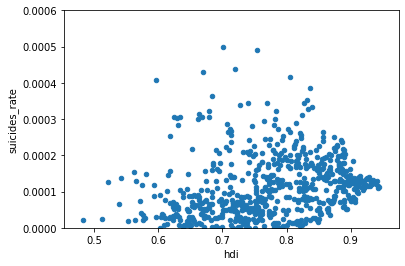

In [56]:
fig, ax = plt.subplots()
suicide_hdi.plot.scatter(x='hdi', y='suicides_rate', ax=ax)
ax.set_ybound(lower=0, upper=0.0006)

In [57]:
reg = smf.ols('suicides_rate ~ hdi', data=suicide_hdi).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides_rate   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     34.23
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           7.54e-09
Time:                        10:21:49   Log-Likelihood:                 5577.5
No. Observations:                 697   AIC:                        -1.115e+04
Df Residuals:                     695   BIC:                        -1.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.629e-05   2.57e-05     -1.410      0.1

<b>The t-value and p-value told us that there is a relationship between suicides rate and hdi, and the R-square is higher, which is 0.047, but we still can not find a strong relationship between hdi and suicides rate.</b>

In [58]:
# explore the relationship between hdi and sex
male_female = df.groupby('sex')['suicides_no'].sum() / df.groupby('sex')['population'].sum()

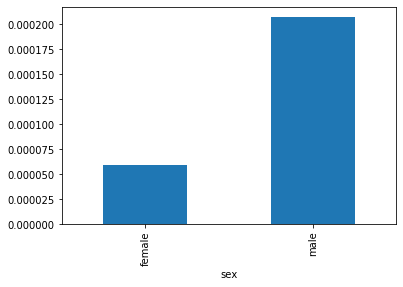

In [59]:
male_female.plot.bar()

<b>We can find a clear distinction between the suicides rate of male and female, this tells us that male has four times the possibility of suicide than female.</b>

In [60]:
ages = df.groupby('age')['suicides_no'].sum() / df.groupby('age')['population'].sum()

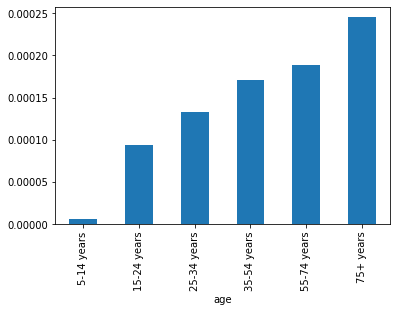

In [61]:
ages.sort_values().plot.bar()

<b>We can also find a relationship between suicides rate and age, generally speaking, as age increases, the probability of suicide increases.</b>

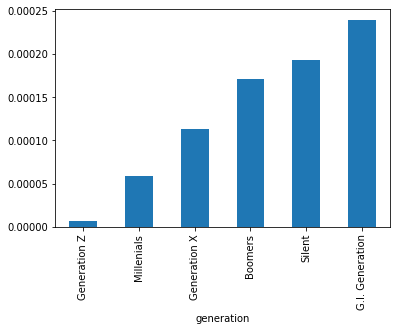

In [62]:
ages = df.groupby('generation')['suicides_no'].sum() / df.groupby('generation')['population'].sum()
ages.sort_values().plot.bar()

<b> The relationship between suicides rate and generation just corresponds to that between suicides rate and age.</b>

<b> We have found out that sex and age influence suicides the most, so we are going to use these two factors to build KNeighborsRegreessor model to predict the suicides rate.<b>

In [66]:
from patsy import dmatrices
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor as rf

In [67]:
# y, X = dmatrices('suicides_rate ~ HDI + gdp_for_year + gdp_per_capita', df2)
y, X = dmatrices('suicides_rate ~ sex + age', df2)

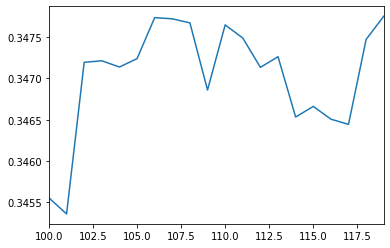

In [68]:
knn_scores = pd.Series()
for i in range(100, 120, 1):
    knn_scores.loc[i] = cross_val_score(knn(n_neighbors=i),X,np.ravel(y),cv=2).mean()
knn_scores.plot()

In [69]:
# We can find that the model is most useful when n_neighbors is set to 106
cross_val_score(knn(n_neighbors=106),X,np.ravel(y),cv=2).mean()

0.3477382747360774

In [70]:
knn(n_neighbors=106).fit(X,y).predict(X)

array([[16.28245283],
       [26.47028302],
       [ 8.17698113],
       ...,
       [ 0.88415094],
       [ 0.52386792],
       [ 4.41745283]])